In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import geopandas as gpd

In [3]:
map_df = gpd.read_file('../src_data/us_county_mainland/us_county.shp')

In [4]:
simu_case_df = pd.read_csv('../statistical_approach/test/simu_1_region_level.csv', dtype={'GeoId':str})
simu_case_df['GeoId_county'] = simu_case_df['GeoId'].apply(lambda x: int(x[:5]))
simu_case_df = simu_case_df.iloc[::-1].reset_index(drop=True)
# simu_case_df['total infected'] = simu_case_df['Infectious'] + simu_case_df['Recovered']
# simu_case_df['total percent infected'] = simu_case_df['total infected'] / (simu_case_df['total infected'] + simu_case_df['Susceptible'])
simu_case_df =  simu_case_df.sort_values(by = 'Day', ascending=True)

In [34]:
single_day_df = simu_case_df[simu_case_df['Day'] == 180]
single_day_df = single_day_df.groupby('GeoId_county')[['Susceptible', 'Infectious', 'Recovered']].sum(['Susceptible', 'Infectious', 'Recovered']).reset_index()
single_day_df['total infected'] = single_day_df['Infectious'] + single_day_df['Recovered']
single_day_df['total percent infected'] = single_day_df['total infected'] / (single_day_df['total infected'] + single_day_df['Susceptible'])
single_day_df['GeoId_county'] = single_day_df['GeoId_county'].apply(lambda x: int(x))
single_day_df

,GeoId_county,Susceptible,Infectious,Recovered,total infected,total percent infected
0,1029,2106,1,1,2,0.000949
1,4013,6278,2,2,4,0.000637
2,5031,3952,1,0,1,0.000253
3,6001,21746,14,9,23,0.001057
4,6013,560925,4892,9694,14586,0.025344
...,...,...,...,...,...,...
528,55113,12496,90,107,197,0.015520
529,55127,2456,1,0,1,0.000407
530,55129,7487,18,27,45,0.005975
531,55133,4392,2,1,3,0.000683


In [31]:
def plot_day(i):
    fig, ax = plt.subplots(figsize = (10,10))
    plot_day_df = simu_case_df[simu_case_df['Day'] == i]
    plot_day_df = plot_day_df.groupby('GeoId_county')[['Susceptible', 'Infectious', 'Recovered']].sum(['Susceptible', 'Infectious', 'Recovered']).reset_index()
    plot_day_df['total infected'] = plot_day_df['Infectious'] + plot_day_df['Recovered']
    plot_day_df['total percent infected'] = plot_day_df['total infected'] / (plot_day_df['total infected'] + plot_day_df['Susceptible'])
    plot_day_df['GeoId_county'] = plot_day_df['GeoId_county'].apply(lambda x: '%05d'%x)
    prob_map_df = map_df.merge(plot_day_df, left_on='GEOID', right_on='GeoId_county', how = 'left').fillna(0)
    prob_map_df.plot(column='total percent infected', cmap='Blues', ax = ax, linewidth = 0.1, legend=False)
    ax.axis('off')

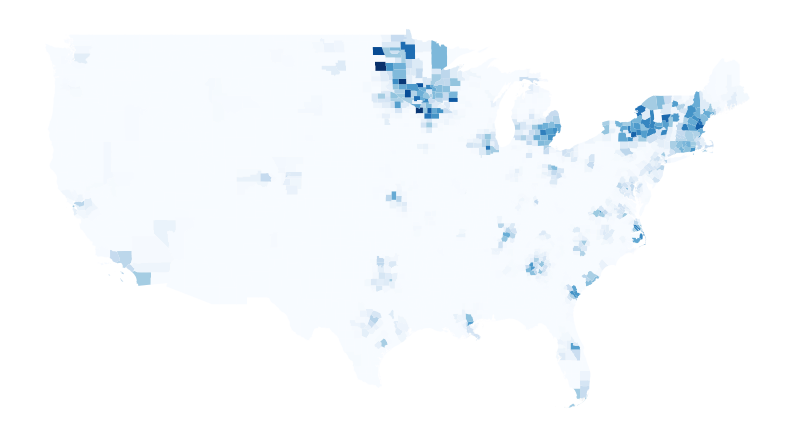

In [33]:
plot_day(240)

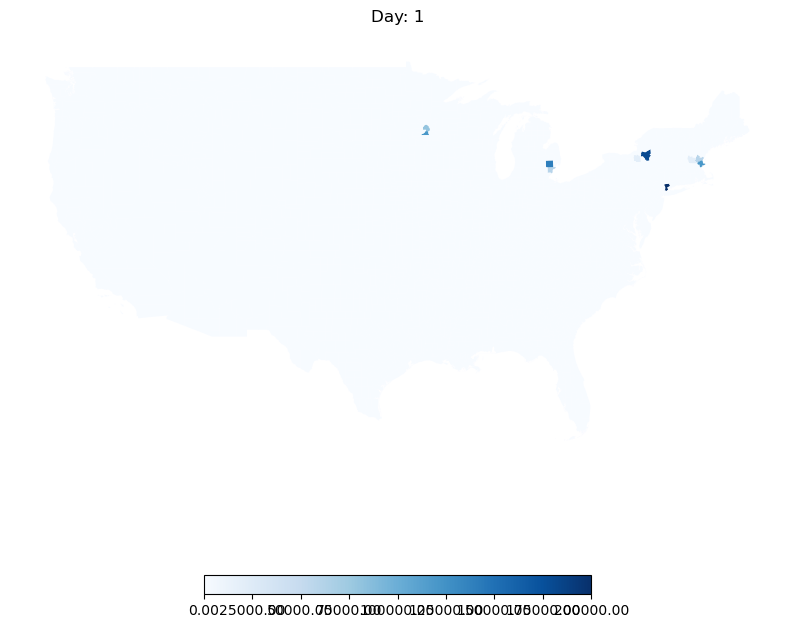

In [5]:
fig, ax = plt.subplots(figsize = (10,10))

norm = plt.Normalize(vmin=0, vmax=200000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Only needed for adding the colorbar
colorbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, format='%.2f')

def animate(i):
    ax.clear()
    plot_day_df = simu_case_df[simu_case_df['Day'] == i]
    plot_day_df = plot_day_df.groupby('GeoId_county')[['Susceptible', 'Infectious', 'Recovered']].sum(['Susceptible', 'Infectious', 'Recovered']).reset_index()
    plot_day_df['total infected'] = plot_day_df['Infectious'] + plot_day_df['Recovered']
    plot_day_df['total percent infected'] = plot_day_df['total infected'] / (plot_day_df['total infected'] + plot_day_df['Susceptible'])
    plot_day_df['GeoId_county'] = plot_day_df['GeoId_county'].apply(lambda x: '%05d'%x)
    prob_map_df = map_df.merge(plot_day_df, left_on='GEOID', right_on='GeoId_county', how = 'left').fillna(0)
    prob_map_df.plot(column='total infected', cmap='Blues', ax = ax, linewidth = 0.1, legend=False)
    ax.axis('off')
    ax.annotate(f'Day: {i+1}', xy=(0.5, 1.05), xycoords='axes fraction', fontsize=12, ha='center')
ani = animation.FuncAnimation(fig, animate, frames=240, repeat=False, interval=1000)
ani.save('simu_case_cases.mp4', writer='ffmpeg', fps=3)

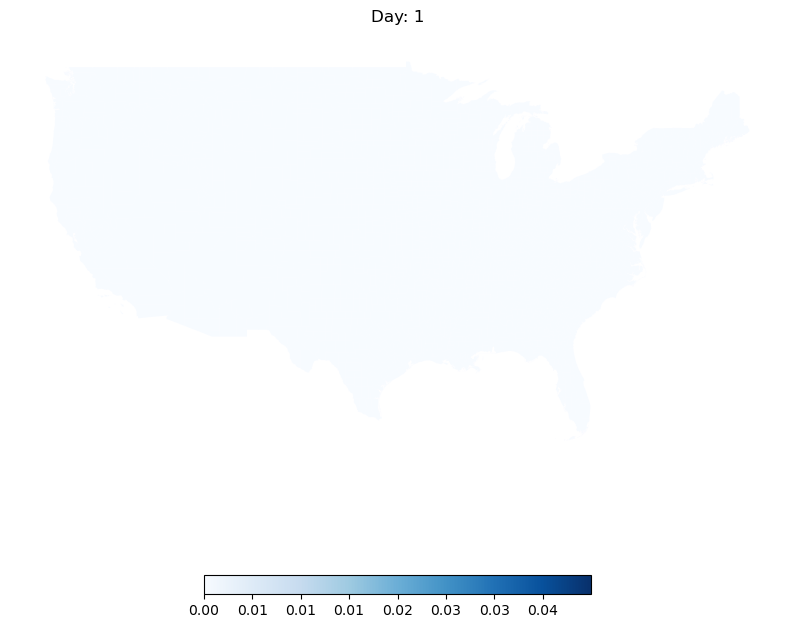

In [12]:
fig, ax = plt.subplots(figsize = (10,10))

norm = plt.Normalize(vmin=0, vmax=simu_case_df['total percent infected'].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Only needed for adding the colorbar
colorbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, format='%.2f')

def animate(i):
    ax.clear()
    plot_day_df = simu_case_df[simu_case_df['day'] == (i+1)]
    plot_day_df = plot_day_df.drop_duplicates(subset=['cbg'])
    prob_map_df = map_df.merge(plot_day_df, left_on='GEOID', right_on='GeoId', how = 'left').fillna(0)
    prob_map_df.plot(column='total percent infected', cmap='Blues', ax = ax, linewidth = 0.1, legend=False, norm = norm)
    ax.axis('off')
    ax.annotate(f'Day: {i+1}', xy=(0.5, 1.05), xycoords='axes fraction', fontsize=12, ha='center')
ani = animation.FuncAnimation(fig, animate, frames=180, repeat=False, interval=1000)
ani.save('simu_percent_cases.mp4', writer='ffmpeg', fps=2)